In [19]:
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

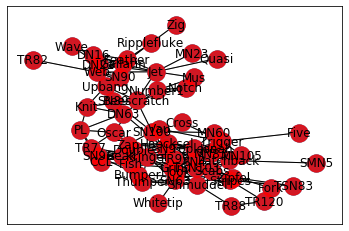

In [21]:
G = nx.read_gml('dolphins.gml')
plot_graph(G)

In [22]:
print(list(G.nodes()))
print(G.edges)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL',

In [23]:
# 构建GCN，计算A_hat和D_hat矩阵
# 先排序
order = sorted(list(G.nodes()))
# print(order)

# 构建邻接矩阵
A = to_numpy_matrix(G, nodelist=order)
# print(A)

# 生成对角矩阵
I= np.eye(G.number_of_nodes())
A_hat = A + I
# print(A_hat)

# 构建D_hat矩阵，即A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
# print(D_hat)

D_hat = np.matrix(np.diag(D_hat))
# print(D_hat)

# 初始化权重
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[-0.4121557   1.84550794 -0.96368092  0.25169064]
 [ 0.76989779  0.11406259  0.98444893 -0.37503876]
 [-2.11788824 -0.27140717 -1.14341386  0.97465304]
 [-0.25990668 -0.32927101 -0.60636661 -1.41643446]
 [-0.17754848 -0.12608323  0.53686123 -1.76254114]
 [ 0.82012858  0.19822026  0.11872527  1.49433631]
 [ 0.8095806  -0.6394988  -0.33354765  0.44222066]
 [-0.61417624 -0.56486025 -1.06584659 -2.35095318]
 [ 0.11956374 -0.91960456 -0.55287833  0.98686378]
 [ 1.87171867  1.54506254 -0.68683196  0.04496184]
 [ 1.01727245 -1.10976911  0.58327006 -0.18398309]
 [ 1.09354614  1.3401672  -1.09189287 -1.95028071]
 [ 0.33001549  1.44959888  1.27616015 -0.36517694]
 [-2.19152996 -0.73798409  0.05572419  1.32509344]
 [-1.89236733  0.99132272  0.7926572   0.0306961 ]
 [ 0.93482212  1.99423117  0.43100719 -0.45394578]
 [-0.14810664 -1.06526845 -1.42678825 -0.48809769]
 [-1.64486022  0.27873906  0.69450785  1.2346837 ]
 [ 0.03109074  0.39532855 -1.0981052  -0.93549516]
 [ 0.5554266  -0.40220938

In [24]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X *W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print(output)

[[0.03612287 0.10593211]
 [0.         0.12336802]
 [0.05296705 0.        ]
 [0.00469588 0.00747951]
 [0.         0.28336251]
 [0.01630522 0.        ]
 [0.         0.        ]
 [0.         0.1614334 ]
 [0.0080262  0.00122762]
 [0.         0.        ]
 [0.01243732 0.08588313]
 [0.05723125 0.42020035]
 [0.         0.29990632]
 [0.         0.        ]
 [0.04873644 0.05748374]
 [0.05355896 0.25334375]
 [0.0140542  0.        ]
 [0.02890026 0.0075031 ]
 [0.12432293 0.2826308 ]
 [0.         0.11225746]
 [0.04133726 0.03077433]
 [0.07476006 0.21940672]
 [0.28976577 0.        ]
 [0.04559021 0.09566042]
 [0.12796916 0.25506922]
 [0.16783491 0.22498307]
 [0.13505059 0.16965462]
 [0.10309396 0.17391865]
 [0.         0.        ]
 [0.         0.10311391]
 [0.18130287 0.26899734]
 [0.         0.2846402 ]
 [0.         0.10690679]
 [0.28065122 0.34219282]
 [0.         0.01109713]
 [0.01572622 0.05923051]
 [0.07160329 0.        ]
 [0.         0.        ]
 [0.0425932  0.08789736]
 [0.         0.        ]


In [25]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
    
# print('feature_representations=\n', feature_representations)

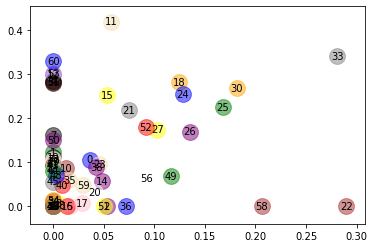

In [47]:
# 绘制output，节点GCN embedding可视化
def plot_node(output):
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    colorListLen = len(colorList)
    
    for i in range(len(nodes)):
        node_name = nodes[i]
#         print(node_name)
        value = i % colorListLen
#         print('value = ', value)
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1], label=str(i), color=colorList[value], alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1], i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.show()
    
plot_node(output)

In [ ]:
# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output)